# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

576

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#making sure I can ping the api
#figure out how to do the from config import api_keys to get key from external file
#url = "https://api.openweathermap.org/data/2.5/weather?lat=35.3&lon=139.09&appid=8f2f2a0323af8684edfd7b4382b6b961"

#url = f"https://api.openweathermap.org/data/2.5/weather?lat=35.5&lon=139.09&appid={api_key}"
#response = requests.get(url).json()
#pprint(response)
#print(response.keys())

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = "{}appid={}&units={}&q=".format(url,api_key,units)

# lists to gather data and later turn into df
sample_city = []
country = []
date = []
cloudiness = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = [] 
city_count = 0

print("  Beginning Data Retrieval\n----------------------------")

for current_city in cities:
    try:
        response = requests.get(query_url+current_city).json()
        sample_city.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt']) #maybe: review api documentation to figure out how date is formated 
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_count = city_count +1
        print(f"Processing city {city_count} | {current_city}")  #need to figure out how to get the numbers in 

    except:
        print("City not found. Skipping...")
     

  Beginning Data Retrieval
----------------------------
City not found. Skipping...
Processing city 1 | cape town
Processing city 2 | isangel
Processing city 3 | shimoda
Processing city 4 | yellowknife
Processing city 5 | uberlandia
Processing city 6 | ushuaia
Processing city 7 | qaanaaq
Processing city 8 | tuktoyaktuk
City not found. Skipping...
Processing city 9 | hobart
Processing city 10 | severo-kurilsk
Processing city 11 | leningradskiy
Processing city 12 | kodiak
Processing city 13 | bethel
Processing city 14 | sao joao da barra
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing city 15 | namatanai
Processing city 16 | rikitea
Processing city 17 | new norfolk
Processing city 18 | torbay
Processing city 19 | ambilobe
Processing city 20 | lensk
Processing city 21 | half moon bay
Processing city 22 | ponta do sol
Processing city 23 | korhogo
Processing city 24 | la ronge
Processing city 25 | nanortalik
Processing city 26 | temir
Processin

Processing city 231 | balaipungut
Processing city 232 | yekaterinoslavka
Processing city 233 | salt
Processing city 234 | airai
Processing city 235 | ahuimanu
City not found. Skipping...
City not found. Skipping...
Processing city 236 | sturgis
City not found. Skipping...
Processing city 237 | nova prata
Processing city 238 | kijang
Processing city 239 | trabzon
Processing city 240 | lazaro cardenas
Processing city 241 | moerai
Processing city 242 | sinnamary
Processing city 243 | daru
Processing city 244 | pacifica
Processing city 245 | puerto escondido
Processing city 246 | nipawin
City not found. Skipping...
Processing city 247 | cairns
Processing city 248 | alindao
Processing city 249 | lagoa
Processing city 250 | colac
Processing city 251 | etchoropo
Processing city 252 | te anau
Processing city 253 | binzhou
Processing city 254 | sulecin
Processing city 255 | constitucion
Processing city 256 | floro
Processing city 257 | westport
City not found. Skipping...
Processing city 258 | 

Processing city 466 | santa marta
Processing city 467 | shu
City not found. Skipping...
Processing city 468 | aklavik
Processing city 469 | boyolangu
Processing city 470 | nata
Processing city 471 | senneterre
Processing city 472 | misratah
Processing city 473 | bay roberts
City not found. Skipping...
Processing city 474 | beloha
Processing city 475 | turtas
Processing city 476 | bima
Processing city 477 | port keats
Processing city 478 | grand gaube
Processing city 479 | narsaq
Processing city 480 | ginir
City not found. Skipping...
Processing city 481 | karpinsk
Processing city 482 | tautira
Processing city 483 | beruwala
Processing city 484 | tura
Processing city 485 | sretensk
Processing city 486 | cuorgne
Processing city 487 | khorixas
Processing city 488 | krasnyy
Processing city 489 | hamilton
City not found. Skipping...
Processing city 490 | hirado
Processing city 491 | takoradi
Processing city 492 | kibala
Processing city 493 | khilok
Processing city 494 | burns lake
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
weather_dict = {
    "City": sample_city,
    "Country": country,
    "Date": date,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Latitude": lat,
    "Longitude": long,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

#Export to csv
weather_data.to_csv ("weather_data.csv", index=None, header=True)

weather_data.head()

,City,Country,Date,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Cape Town,ZA,1547938800,0,59,-33.93,18.42,16.00,9.80
1,Isangel,VU,1547943243,92,100,-19.55,169.27,25.66,7.87
2,Shimoda,JP,1547938800,75,40,34.70,138.93,12.00,5.10
3,Yellowknife,CA,1547938800,75,76,62.45,-114.38,-24.00,8.20
4,Uberlandia,BR,1547943212,36,88,-18.92,-48.28,21.13,1.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

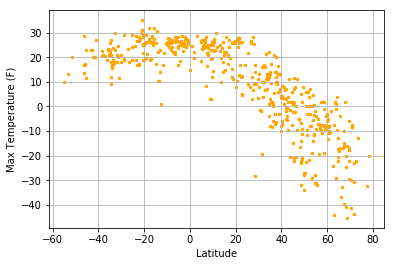

In [35]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker="o",s=6, c="Orange")

plt.title=("Latitude vs. Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

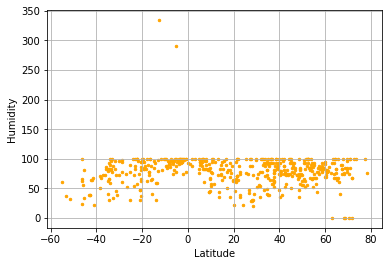

In [34]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o",s=6, c="Orange")

plt.title=("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

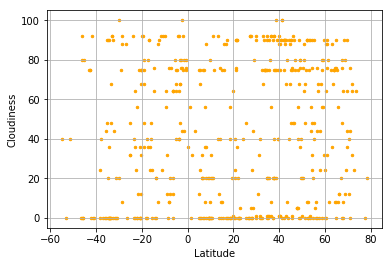

In [38]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o",s=6, c="Orange")

plt.title=("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

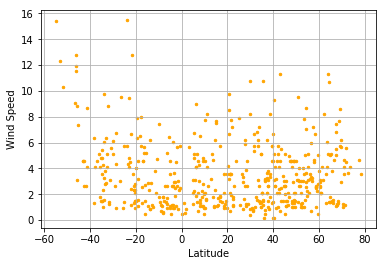

In [32]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o",s=6, c="Orange")

plt.title=("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('lat_vs_wind_speed.png')
plt.show()